# 1. Install Dependencies and Setup

In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imghdr

C:\Users\Angelo\AppData\Local\Temp\ipykernel_8840\1624865645.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
# view all the libraries imported
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio              

# 2. Preprocessing

In [7]:
# Get the current directory
dir = os.getcwd()
current_dir = os.path.join(dir, 'data')
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
print(f"Current working directory: {current_dir}")

Current working directory: C:\Users\Angelo\XRayClassifier\data


In [37]:
for image_class in os.listdir(current_dir): 
    for image in os.listdir(os.path.join(current_dir, image_class)):
        image_path = os.path.join(current_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image C:\Users\Angelo\XRayClassifier\data\NORMAL\.ipynb_checkpoints
Issue with image C:\Users\Angelo\XRayClassifier\data\PNEUMONIA\.ipynb_checkpoints
Issue with image C:\Users\Angelo\XRayClassifier\data\PNEUMONIA\VIRUS


In [39]:
# Build a dataset from a folder of images
data = tf.keras.utils.image_dataset_from_directory(current_dir)

Found 4678 files belonging to 2 classes.


In [41]:
data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

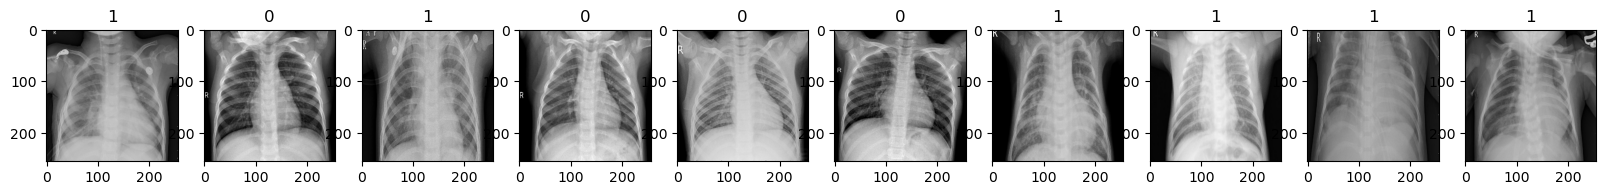

In [45]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
data = data.map(lambda x,y: (x/255, y))

In [49]:
data.as_numpy_iterator().next()

(array([[[[0.11049572, 0.11049572, 0.11049572],
          [0.13306127, 0.13306127, 0.13306127],
          [0.17402114, 0.17402114, 0.17402114],
          ...,
          [0.12690565, 0.12690565, 0.12690565],
          [0.14207996, 0.14207996, 0.14207996],
          [0.14043352, 0.14043352, 0.14043352]],
 
         [[0.09991605, 0.09991605, 0.09991605],
          [0.11141148, 0.11141148, 0.11141148],
          [0.14398894, 0.14398894, 0.14398894],
          ...,
          [0.15831643, 0.15831643, 0.15831643],
          [0.17066056, 0.17066056, 0.17066056],
          [0.19686764, 0.19686764, 0.19686764]],
 
         [[0.09244791, 0.09244791, 0.09244791],
          [0.11839459, 0.11839459, 0.11839459],
          [0.14090839, 0.14090839, 0.14090839],
          ...,
          [0.20090383, 0.20090383, 0.20090383],
          [0.2128753 , 0.2128753 , 0.2128753 ],
          [0.20936121, 0.20936121, 0.20936121]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [53]:
print(f'train size: {train_size}')
print(f'validation size: {val_size}')
print(f'test size: {test_size}')

train size: 102
validation size: 29
test size: 14


In [55]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [57]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 3. Modelling

In [59]:
import keras
from keras import layers
from keras import ops

In [61]:
os.environ["KERAS_BACKEND"] = "tensorflow"

In [114]:
num_classes = 2
input_shape = (256, 256, 3)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [116]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 253, 253, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,762 (944.38 KB)

 Trainable params: 241,762 (944.38 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Training

In [118]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

In [120]:
logdir='logs'

In [122]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [126]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 97s 949ms/step - acc: 0.7044 - loss: 0.5977 - val_acc: 0.8082 - val_loss: 0.3890
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 96s 937ms/step - acc: 0.7978 - loss: 0.4542 - val_acc: 0.8470 - val_loss: 0.3571
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - acc: 0.8476 - loss: 0.3541 - val_acc: 0.8491 - val_loss: 0.3320
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 95s 925ms/step - acc: 0.8744 - loss: 0.2979 - val_acc: 0.9106 - val_loss: 0.2543
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - acc: 0.8935 - loss: 0.2668 - val_acc: 0.9127 - val_loss: 0.2170
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 100s 976ms/step - acc: 0.9003 - loss: 0.2472 - val_acc: 0.8976 - val_loss: 0.2345
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 98s 958ms/step - acc: 0.9092 - loss: 0.2220 - val_acc: 0.9073 - val_loss: 0.2233
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 100s 976ms/step - acc: 0.9158 - loss: 0.2221 - val_acc: 0.9062 - val_loss: 0.2239
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━

# 5. Evaluation and Testing

In [128]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

In [130]:
X_test = []
y_test = []

for batch in test.as_numpy_iterator():
    X, y = batch
    X_test.append(X)
    y_test.append(y)

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [132]:
score = model.evaluate(X_test, y_test, verbose=0)

In [134]:
print(score)

[0.2885597050189972, 0.90625]


# 6. Testing

TypeError: Image data of dtype object cannot be converted to float

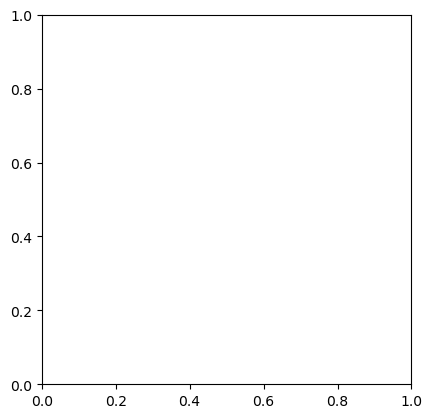

In [136]:
img = cv2.imread('NORMAL-1003233-0001.jpeg')
plt.imshow(img)
plt.show()

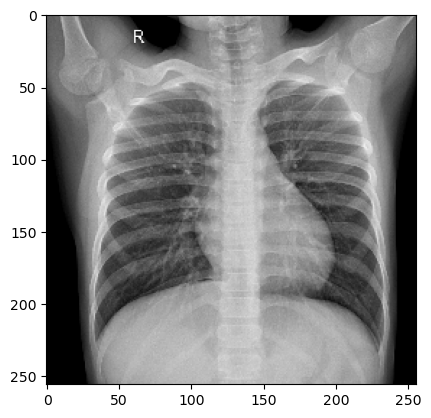

In [96]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [140]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [142]:
yhat

array([[0.9853321 , 0.01466791]], dtype=float32)

In [108]:
if yhat[0][0] > yhat[0][1]:
    print("No Pneumonia detected")
else: 
    print("Patient has Pneumonia")

No Pneumonia detected
